#Cleaning Inaugural Address Data

**Raw Text Source**: [Project Gutenberg](http://www.gutenberg.org/cache/epub/925/pg925.txt)

For more qualitative (and some quantitative) facts about inaugural addresses, check [this](http://blogs.britannica.com/2009/01/inaugural-adresses-the-longest-shortest-dumbest-and-most-memorable/) out.

First, let's import all the packages we'll need to clean the data:
<ul>
<li><code>re</code> for regular expression functions</li>
<li><code>pprint</code> to make printing more readable</li>
<li><code>string</code> to clean string values</li>
<li><code>pandas</code> because <i>duh</i></li>
<li><code>numpy</code> because math</li>
<li><code>matplotlib.pyplot</code> for charts</li>
<li><code>CountVectorizer</code> for parsing tokens and removing stop words</li>
</ul>

In [1]:
%matplotlib inline
import re
import pprint as pp
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

Next, we'll open the text file and read it into a Python string object that can be parsed.

In [2]:
file = open('inaugural.txt', 'r')
file_text = file.read()

Now we'll extract raw versions of speech titles by using <code>re</code> modules.

In [3]:
raw_speech_id_list = re.findall(r'\*\s\*\s\*\s\*\s\*([\w\s\,\.]+)ADDRESS',
                                file_text)

print len(raw_speech_id_list)

55


We'll use a <code>string</code> method (<code>strip</code>) to remove extraneous characters from the title list first. Later, we'll create a <code>dict</code> object that will have each title as a key and each full speech text as a value.

In [4]:
stripped_id_list = [string.strip(title, "\r\n ") for title in raw_speech_id_list]

pp.pprint(stripped_id_list)

['GEORGE WASHINGTON, FIRST INAUGURAL',
 'GEORGE WASHINGTON, SECOND INAUGURAL',
 'JOHN ADAMS INAUGURAL',
 'THOMAS JEFFERSON FIRST INAUGURAL',
 'THOMAS JEFFERSON SECOND INAUGURAL',
 'JAMES MADISON FIRST INAUGURAL',
 'JAMES MADISON, SECOND INAUGURAL',
 'JAMES MONROE FIRST INAUGURAL',
 'JAMES MONROE, SECOND INAUGURAL',
 'JOHN QUINCY ADAMS, INAUGURAL',
 'ANDREW JACKSON, FIRST INAUGURAL',
 'ANDREW JACKSON, SECOND INAUGURAL',
 'MARTIN VAN BUREN, INAUGURAL',
 'WILLIAM HENRY HARRISON, INAUGURAL',
 'JAMES KNOX POLK, INAUGURAL',
 'ZACHARY TAYLOR, INAUGURAL',
 'FRANKLIN PIERCE, INAUGURAL',
 'JAMES BUCHANAN, INAUGURAL',
 'ABRAHAM LINCOLN, FIRST INAUGURAL',
 'ABRAHAM LINCOLN, SECOND INAUGURAL',
 'ULYSSES S. GRANT, FIRST INAUGURAL',
 'ULYSSES S. GRANT, SECOND INAUGURAL',
 'RUTHERFORD B. HAYES, INAUGURAL',
 'JAMES A. GARFIELD INAUGURAL',
 'GROVER CLEVELAND, FIRST INAUGURAL',
 'BENJAMIN HARRISON, INAUGURAL',
 'GROVER CLEVELAND, SECOND INAUGURAL',
 'WILLIAM MCKINLEY FIRST INAUGURAL',
 'WILLIAM MCKINLEY,

Let's move on to cleaning the speech text since we've cleaned the titles.

All the speeches in the text file are separated by "* * * * *" delimiters, so we'll use <code>re.split</code> again to extract all the text between the delimiters.

In [5]:
raw_speech = re.split(r'\*\s\*\s\*\s\*\s\*', file_text)

Next, we'll use <code>re.sub</code> to replace the "Transcriber's Notes" because we only want the speech text for each inaugural address. We'll also ignore the first and last elements in the <code>raw_speech</code> list because it isn't actually speech text.

In [6]:
speeches = [re.sub(r'^([\w\W\s]+)\]', "", speech) for speech in raw_speech[1:len(raw_speech)-1]]
print len(speeches)

55


Finally, we'll use a combination of <code>re.sub</code> and <code>string.strip</code> to clean up all the extra spaces and newline characters in each speech.

In [8]:
clean_speeches = []
[clean_speeches.append(re.sub(r'\r\n',
                              " ",
                              string.strip(speech,
                                           "\r\n"))) for speech in speeches]

pp.pprint(clean_speeches[-1])

'GEORGE W. BUSH, SECOND INAUGURAL ADDRESS  THURSDAY, JANUARY 20, 2005    Vice President Cheney, Mr. Chief Justice, President Carter, President Bush, President Clinton, reverend clergy, distinguished guests, fellow citizens:  On this day, prescribed by law and marked by ceremony, we celebrate the durable wisdom of our Constitution, and recall the deep commitments that unite our country. I am grateful for the honor of this hour, mindful of the consequential times in which we live, and determined to fulfill the oath that I have sworn and you have witnessed.  At this second gathering, our duties are defined not by the words I use, but by the history we have seen together. For a half century, America defended our own freedom by standing watch on distant borders. After the shipwreck of communism came years of relative quiet, years of repose, years of sabbatical--and then there came a day of fire.  We have seen our vulnerability--and we have seen its deepest source. For as long as whole regio

Now that the data are all clean, we can create the <code>dict</code> that we mentioned earlier. But first, we'll create <code>list</code> of zipped <code>tuple</code>s, in case we need to access the data by index, since the key values in the <code>dict</code> will be a little unwieldy to invoke.

In [9]:
# Zip the titles and speeches together
speeches_zip = zip(stripped_id_list, clean_speeches)

# Create a dictionary from the zipped data
speeches_dict = dict(speeches_zip)

In [10]:
pp.pprint(speeches_zip[:2])

[('GEORGE WASHINGTON, FIRST INAUGURAL',
  'Fellow-Citizens of the Senate and of the House of Representatives:  Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years--a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrut

Now that the data are mostly clean, we can now begin parsing the actual speech words using <code>CountVectorizer</code>.

We'll since the <code>get_feature_names</code> method for <code>CountVectorizer</code> instances returns Unicode strings, we'll use the <code>encode</code> function to convert the resulting tokens to ASCII strings.

In [11]:
vect = CountVectorizer(decode_error = 'ignore', stop_words='english')
vect.fit(clean_speeches)
raw_feature_names = [token.encode('ascii','ignore') for token in vect.get_feature_names()]

pp.pprint(raw_feature_names[:100])

['000',
 '100',
 '120',
 '125',
 '13',
 '14th',
 '15th',
 '16',
 '1774',
 '1776',
 '1778',
 '1780',
 '1787',
 '1789',
 '1790',
 '1800',
 '1801',
 '1812',
 '1815',
 '1816',
 '1817',
 '1818',
 '1826',
 '1850',
 '1861',
 '1868',
 '1873',
 '1880',
 '1886',
 '1890',
 '1893',
 '1896',
 '1897',
 '1898',
 '1899',
 '18th',
 '1907',
 '1917',
 '1933',
 '1941',
 '1945',
 '1963',
 '1972',
 '1980',
 '1984',
 '1997',
 '19th',
 '20',
 '200',
 '2001',
 '2005',
 '200th',
 '20th',
 '21st',
 '225',
 '25',
 '30',
 '30th',
 '3d',
 '41',
 '48',
 '4th',
 '50',
 '50th',
 '60',
 '67',
 '6th',
 'abandon',
 'abandoned',
 'abandonment',
 'abate',
 'abdicated',
 'abeyance',
 'abhorring',
 'abide',
 'abiding',
 'abilities',
 'ability',
 'abject',
 'able',
 'abnormal',
 'abode',
 'abodes',
 'abolish',
 'abolished',
 'abolishing',
 'aboriginal',
 'aborigines',
 'abound',
 'abounding',
 'abounds',
 'abraham',
 'abreast',
 'abridging',
 'abroad',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb']


We'll create a document-term matrix that will allow us to then create a <code>DataFrame</code> that counts the number of times each token appears in each speech:

In [12]:
dtm = vect.transform(clean_speeches)
dtm.toarray()
raw_df = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

Let's clean up the <code>DataFrame</code> by ignoring all the "number" tokens so we're left with only full words. We'll also add the titles to the final <code>DataFrame</code> to make labelling easier.

In [30]:
df = raw_df.iloc[:,raw_feature_names.index('6th')+1:]

df['title_id'] = stripped_id_list

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

print df

print df

                                       title_id  abandon  abandoned  \
0            GEORGE WASHINGTON, FIRST INAUGURAL        0          0   
1           GEORGE WASHINGTON, SECOND INAUGURAL        0          0   
2                          JOHN ADAMS INAUGURAL        0          1   
3              THOMAS JEFFERSON FIRST INAUGURAL        1          0   
4             THOMAS JEFFERSON SECOND INAUGURAL        0          0   
5                 JAMES MADISON FIRST INAUGURAL        0          0   
6               JAMES MADISON, SECOND INAUGURAL        0          0   
7                  JAMES MONROE FIRST INAUGURAL        0          0   
8                JAMES MONROE, SECOND INAUGURAL        2          0   
9                  JOHN QUINCY ADAMS, INAUGURAL        0          0   
10              ANDREW JACKSON, FIRST INAUGURAL        0          0   
11             ANDREW JACKSON, SECOND INAUGURAL        0          1   
12                  MARTIN VAN BUREN, INAUGURAL        0          0   
13    

/Users/Jay/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


We can now begin plotting the data. First, we'll take the twenty most used words among all the inaugural addresses.

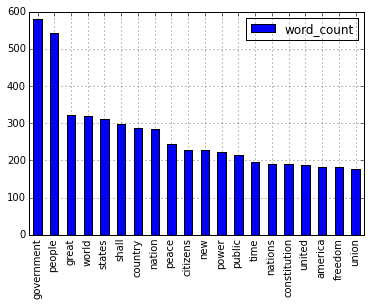

In [92]:
df_counts = pd.DataFrame(df.iloc[:,1:].apply(np.sum, axis=0), columns=['word_count'])
df_counts_sorted = df_counts.sort(['word_count'], ascending = [0])[:20]

df_counts_sorted.plot(kind='bar')

Let's take a look at the gabbiest presidents (on average). First, let's use <code>pandas.DataFrame.sum</code> to get the word count for each speech, then <code>sort</code> the results.

                             title_id  word_count
13  WILLIAM HENRY HARRISON, INAUGURAL        3314
30     WILLIAM HOWARD TAFT, INAUGURAL        2331
14         JAMES KNOX POLK, INAUGURAL        2030
25       BENJAMIN HARRISON, INAUGURAL        1902
8      JAMES MONROE, SECOND INAUGURAL        1794
27   WILLIAM MCKINLEY FIRST INAUGURAL        1688
34         CALVIN COOLIDGE, INAUGURAL        1672
35          HERBERT HOOVER, INAUGURAL        1615
33       WARREN G. HARDING, INAUGURAL        1557
18   ABRAHAM LINCOLN, FIRST INAUGURAL        1436
16         FRANKLIN PIERCE, INAUGURAL        1416
7        JAMES MONROE FIRST INAUGURAL        1390
12        MARTIN VAN BUREN, INAUGURAL        1368
23        JAMES A. GARFIELD INAUGURAL        1306
9        JOHN QUINCY ADAMS, INAUGURAL        1245


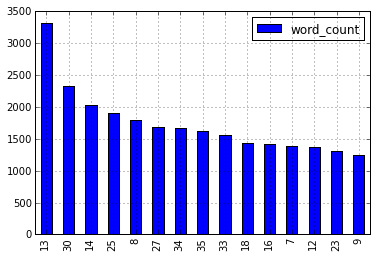

In [89]:
df_speech_wc = pd.DataFrame(df.sum(axis=1), columns=['word_count'])

# Add 'title_id' again to make labelling clearer
df_speech_wc['title_id'] = df.title_id

# Switch column order for better legibility
cols_wc = df_speech_wc.columns.tolist()
cols_wc = cols_wc[-1:] + cols_wc[:-1]
df_speech_wc = df_speech_wc[cols_wc]

# Sort the results in descending order by word_count
df_speech_wc_sorted = df_speech_wc.sort('word_count', ascending = [0])

# Print and plot the top 15 longest speeches
print df_speech_wc_sorted[:15]
df_speech_wc_sorted[:15].plot(kind='bar')

Looks like two Williams - Henry Harrison and Howard Taft - have the longest speeches, the former almost 1,000 words longer than the latter. William McKinley also makes an appearance in the top ten. Clearly, a correlation between the name William and speech length has emerged!

I'm kidding about that last part.

Last, let's plot the unsorted word counts to get an idea of if, and if so, how speech length has changed over time.

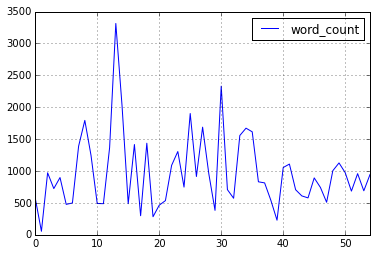

In [91]:
df_speech_wc.plot(kind='line')

Yeah, that doesn't look promising.